## Проблема метода максимального правдоподобия

Допустим, дана случайная величина $\xi$ с распределением Бернулли с неизвестным параметром $p$: 

$$f_{\xi}(x) = p^x (1 - p)^{1 - x}$$

Дана выборка $x = (x_1, \dots, x_n)$ из этой случайной величины. Необходимо оценить $p$ по выборке. Один из наиболее известных способов это сделать – воспользоваться методом максимального правдоподобия. Составим функцию правдоподобия для нашей выборки:

$$L(x, p) = \prod \limits_{i = 1}^n { p^{x_i} (1 - p)^{1 - x_i} }$$

Можно немного упростить это произведение:

$$L(x, p) = p^{ \sum \limits_{i = 1}^n x_i } (1 - p)^{ \sum \limits_{i = 1}^n (1 - x_i) }$$

Обозначим для краткости

$$n_1 = \sum \limits_{i = 1}^n x_i, \quad n_0 = n - n_1 = \sum \limits_{i = 1}^n (1 - x_i)$$

Получаем

$$L(x, p) = p^{n_1} (1 - p)^{n_0}$$

В методе максимального правдоподобия нам необходимо найти точку максимума функции $L$

$$p^{n_1} (1 - p)^{n_0} \rightarrow \max_p$$

Дифференцируем по $p$

$$\frac{\partial L(x, p)}{\partial p} = n_1 p^{n_1 - 1} (1 - p)^{n_0} - n_0 p^{n_1} (1 - p)^{n_0 - 1}$$

$$\frac{\partial L(x, p)}{\partial p} = (n_1 (1 - p) - n_0 p) p^{n_1 - 1} (1 - p)^{n_0 - 1}$$

$$\frac{\partial L(x, p)}{\partial p} = (n_1 - n p) p^{n_1 - 1} (1 - p)^{n_0 - 1}$$

Степенная функция в нуль не обращается, значит, наша оценка

$$n_1 - n \hat{p} = 0$$

$$\hat{p} = \frac{n_1}{n} = \frac{1}{n} \sum \limits_{i = 1}^n x_i$$

***Замечание.*** Мы получили несмещённую оценку. В том плане, что если $x_i, i = \overline{1, n}$ – независимые одинаково распределённые случайные величины с таким же распределением, что и $\xi$, то

$$\text{E} \hat{p} = \frac{1}{n} \sum \limits_{i = 1}^n \text{E} x_i = \frac{1}{n} \sum \limits_{i = 1}^n p = p$$

В чём минус такого подхода? Мы будем получать неадекватную оценку при маленьких $n$. Действительно

$$\hat{p} = \frac{7}{10} \quad \text{и} \quad \hat{p} = \frac{700}{1000}$$

это *разные* оценки, несмотря на то, что они равны численно. Как же быть? 

## Байесовская статистика

На самом деле, если Вас спросить, какова вероятность выпадения монетки орлом, вы заранее предполагаете, что $p = 0.5$. Такое предположение называется *априорным*: если выборка отсутствует, что 

$$\text{E}p = \frac{1}{2}$$

Как это можно формализовать? Давайте будем предполагать, что $\hat{p}$ имеет некоторое распределение, которое зависит от выборки. Итак, пусть $f(p)$ – ариорное определение параметра $p$ (можно заранее сказать, что $f(p)$ принимает положительные значения только на промежутке $[0, 1]$). В таком случае, *апостериорное распределение* можно определить по теореме Байеса:

$$f(p|x) = \frac{f(x|p)f(p)}{\int \limits_0^1 f(x|\theta)f(\theta) d\theta}$$

где $f(x|p)$ – функция правдоподобия выборки. 

Выберем бета-распределение в качестве априорного $\hat{p} \sim Beta(a, b)$, сейчас станет ясно, почему. 

**Определение.** Говорят, что случайная величина $\eta$ имеет бета-распределение, если 

$$f_{\eta}(x) = \frac{x^{a - 1} (1 - x)^{b - 1}}{B(a, b)},$$

где

$$B(a, b) = \int \limits_0^1 x^{a - 1} (1 - x)^{b - 1} dx$$

Вычислим апостериорное распределение по теореме Байеса 

$$f(x|p)f(p) = \frac{1}{B(a, b)} p^{a - 1} (1 - p)^{b - 1} p^{n_1} (1 - p)^{n_0} = \frac{1}{B(a, b)} p^{n_1 + a - 1} (1 - p)^{n_0 + b - 1}$$

$$\int_0^1 f(x|p)f(p)dp = \frac{1}{B(a, b)} \int_0^1 p^{n_1 + a - 1} (1 - p)^{n_0 + b - 1}dp = \frac{B(a + n_1, b + n_0)}{B(a, b)}$$

Получается, что апостериорное распределение – это тоже бета-распределение, но с другими параметрами. 

**Определение.** Бета-распределение называется сопряжённым априорным распределением к семейству функций правдоподобия 

$$L(x, p) = p^{n_1} (1 - p)^{n_0}$$

Пусть изначально $a = b = 1$. Тогда 

$$f(p) = 1,$$

то есть, когда информации нет, мы считаем, что $p$ равномерно распределена на промежутке $[0, 1]$, причём $\text{E}p = 0.5$. Ниже приведены плотности бета-распределений для разных $a, b$ из нашего примера

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import beta

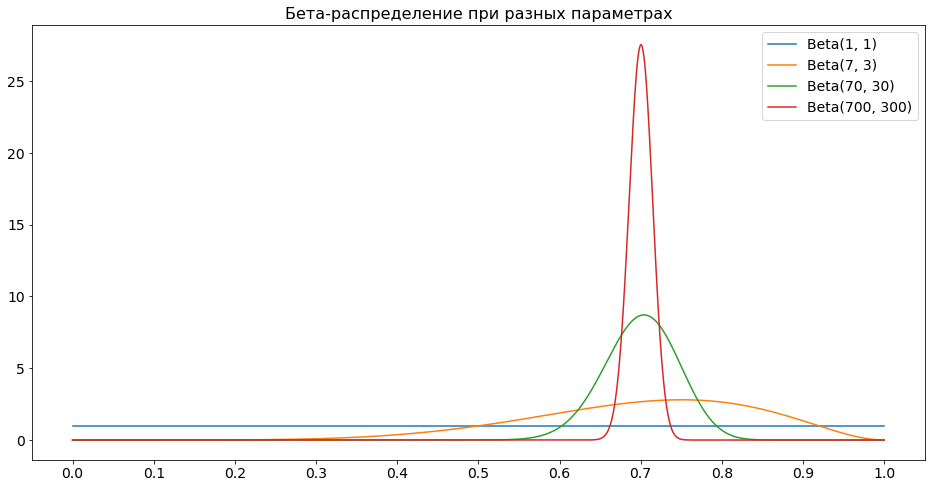

In [2]:
p = np.linspace(0, 1, 1000)

plt.figure(figsize=(16, 8))
plt.plot(p, beta(1, 1).pdf(p), label="Beta(1, 1)")
plt.plot(p, beta(7, 3).pdf(p), label="Beta(7, 3)")
plt.plot(p, beta(70, 30).pdf(p), label="Beta(70, 30)")
plt.plot(p, beta(700, 300).pdf(p), label="Beta(700, 300)")
plt.xticks(np.linspace(0, 1, 11), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title("Бета-распределение при разных параметрах", fontsize=16)
plt.show()

Чем больше элементов в выборке, тем меньше дисперсия нашей оценки. 

## Латентное размещение Дирихле

Мы уже знаем, как устроен вероятностный латентный семантический анализ. Латентное размещение Дирихле является лишь модицикацией данного метода, которая состоит в более жёстких предположениях относительно вероятностей $P(w|t)$ и $P(t|d)$. Ранее мы предполагали, что документы формируются следующим образом: человек сначала случайно выбирает тему из распределения $P(t|d)$, а затем слово из распределения $P(w|t)$, и пишет это слово, и так – пока не надоест. Теперь наши предположения следующие:

1. Количество слов в документе подчиняется закону распределения Пуассона

$$|d| \sim Poiss(\lambda)$$

2. Распределение тем имеет категориальное распределение

3. Человек сначала выбирает параметр $\theta \sim Dir(\alpha)$, где $Dir(\alpha)$ – распределение Дирихле (или *многомерное бета-распределение*)

$$f(\theta) = \frac{1}{B(\alpha)} \prod x^{\alpha_k - 1}$$

4. Затем выбирается тема из категориального распределения с законом распределения $\theta$ (как и в примере с монеткой, распределение Дирихле является априорно сопряжённым к категориальному)

5. Слово выбирается из категориального распределения выбранной темы (имеются в виду вероятности $P(w|t)$)

Параметры распределения, как и в методе pLSA, подбираются EM-алгоритмом.